In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
%matplotlib inline


np.random.seed(0) # so our results will be copyable

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import classification_report

import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Conv1D, MaxPool1D, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import mlxtend 

In [2]:
random_seed = 0

In [3]:
train = pd.read_csv('C:/Users/AymanAbdelall/Desktop/ECGproject/dataset/mitbih_train.csv/mitbih_train.csv', header=None)
test = pd.read_csv('C:/Users/AymanAbdelall/Desktop/ECGproject/dataset/mitbih_test.csv/mitbih_test.csv', header=None)

In [4]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [5]:
train.shape

(87554, 188)

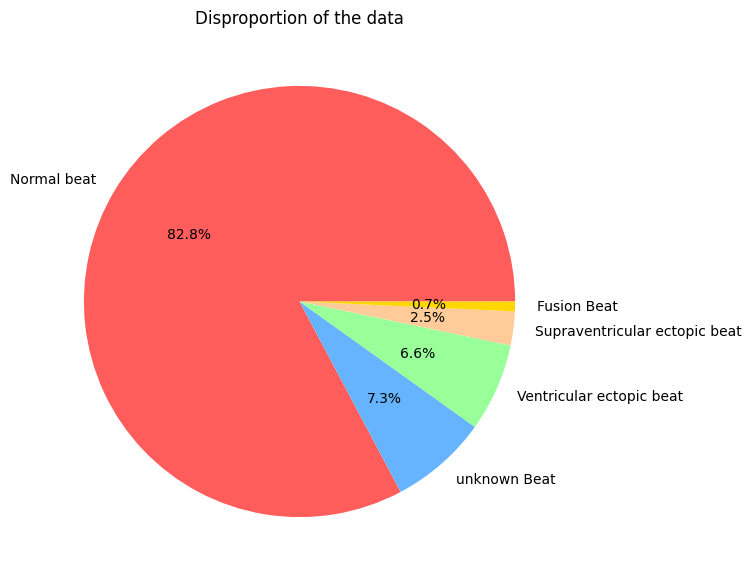

In [6]:
plt.figure(figsize=(7, 7))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(train[187].value_counts(), labels=['Normal beat', 'unknown Beat', 'Ventricular ectopic beat', 'Supraventricular ectopic beat', 'Fusion Beat'], autopct='%1.1f%%', colors = ['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
)
plt.title('Disproportion of the data')
plt.show()

In [7]:
df_0=(train[train[187]==0]).sample(n=20000,random_state=42)
df_1=train[train[187]==1]
df_2=train[train[187]==2]
df_3=train[train[187]==3]
df_4=train[train[187]==4]


df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=random_seed+1)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=random_seed+2)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=random_seed+3)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=random_seed+4)

train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

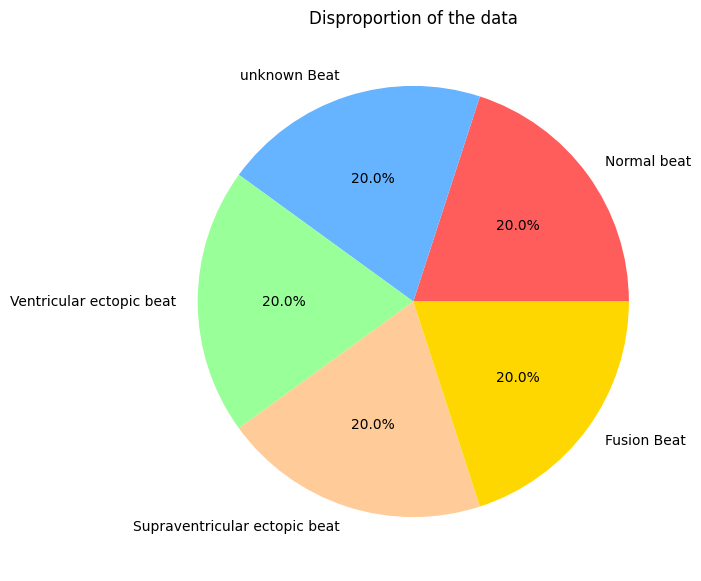

In [8]:
plt.figure(figsize=(7, 7))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(train[187].value_counts(), labels=['Normal beat', 'unknown Beat', 'Ventricular ectopic beat', 'Supraventricular ectopic beat', 'Fusion Beat'], autopct='%1.1f%%', colors = ['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
)
plt.title('Disproportion of the data')
plt.show()

In [9]:
X_train, y_train = train.iloc[:, :187], train[187]
X_test, y_test = test.iloc[:, :187], test[187] #I didn't resample test dataset because it have to stay baised as it was to give right accuracy and f1 score

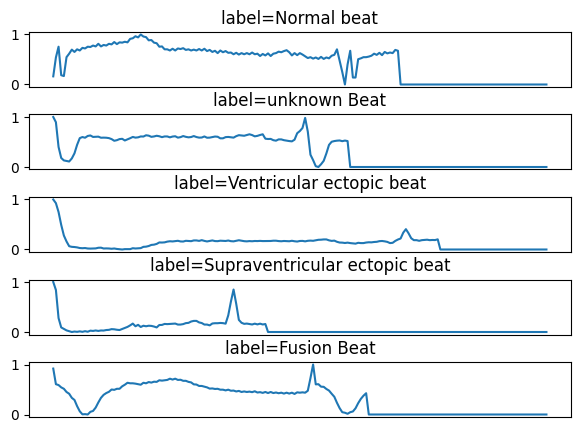

In [10]:
labels = {0: 'Normal beat', 1: 'unknown Beat', 2: 'Ventricular ectopic beat', 3: 'Supraventricular ectopic beat', 4: 'Fusion Beat'}
fig, ax = plt.subplots(5,1, figsize=(7,5), gridspec_kw={'hspace': 0.5})
for i in range(5):
    ax[i].plot(X_train[y_train==i].iloc[0])
    ax[i].set_title(f'label={labels[i]}')
    ax[i].set_xticks([])

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

N: 'Normal beat', S: 'unknown Beat', V: 'Ventricular ectopic beat', F: 'Supraventricular ectopic beat', Q: 'Fusion Beat' 


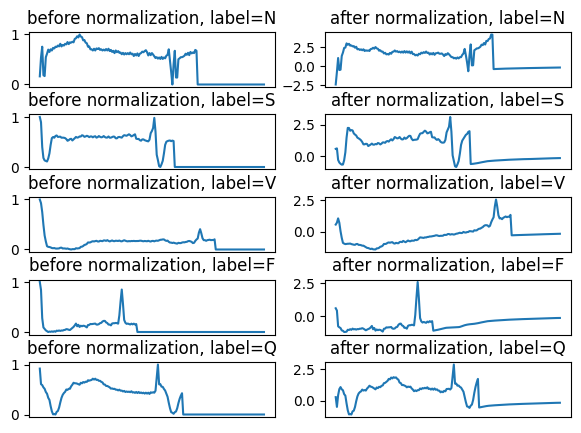

In [12]:
print("N: 'Normal beat', S: 'unknown Beat', V: 'Ventricular ectopic beat', F: 'Supraventricular ectopic beat', Q: 'Fusion Beat' ")
labels = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
fig, ax = plt.subplots(5,2, figsize=(7,5), gridspec_kw={'hspace': 0.5})
for i in range(5):
    ax[i][0].plot(X_train[y_train==i].iloc[0])
    ax[i][1].plot(X_train_norm[y_train==i][0])
    ax[i][0].set_title(f'before normalization, label={labels[i]}')
    ax[i][0].set_xticks([])
    ax[i][1].set_xticks([])
    ax[i][1].set_title(f'after normalization, label={labels[i]}')

In [13]:
(X_train.shape[1],1)

(187, 1)

In [14]:
model = Sequential([
    Input(shape=(X_train_norm.shape[1], 1)),
    Conv1D(128, 11, activation='relu', padding='Same'),
    MaxPool1D(pool_size=3, strides=2, padding='same'),
    Conv1D(64, 3, activation='relu', padding='Same'),
    MaxPool1D(pool_size=3, strides=2, padding='same'),
    Conv1D(64, 3, activation='relu', padding='Same'),
    MaxPool1D(pool_size=3, strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='linear')
])

In [15]:
model.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True))

In [16]:
model.fit(X_train_norm, y_train, epochs=16, batch_size=32)

Epoch 1/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.3967
Epoch 2/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.1014
Epoch 3/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0644
Epoch 4/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 0.0457
Epoch 5/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0359
Epoch 6/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0294
Epoch 7/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0281
Epoch 8/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0237
Epoch 9/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0226
Epoch 10/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0175
Epoch 11/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0143
Epoch 12/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0212
Epoch 13/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0150
Epoch 14/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0144
Epoch 15/16
312

In [17]:
pred = model.predict(X_test_norm)
pred_after_softmax = tf.nn.softmax(pred)
pred_after_softmax = pred_after_softmax.numpy() #convert to numpy to use masking further
y_test_pred = pred_after_softmax.argmax(axis=1) #find result in every case
print(f'Test set accuracy is {round((y_test_pred == y_test).sum() / y_test.shape[0] * 100, 2)}%')

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test set accuracy is 97.14%


In [18]:
pred = model.predict(X_train_norm)
pred_after_softmax = tf.nn.softmax(pred)
pred_after_softmax = pred_after_softmax.numpy() #convert to numpy to use masking further
y_train_pred = pred_after_softmax.argmax(axis=1) #find result in every case
print(f'Train set accuracy is {round((y_train_pred == y_train).sum() / y_train.shape[0] * 100, 2)}%')

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Train set accuracy is 99.39%


In [19]:
class_names = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}



Normalized confusion matrix


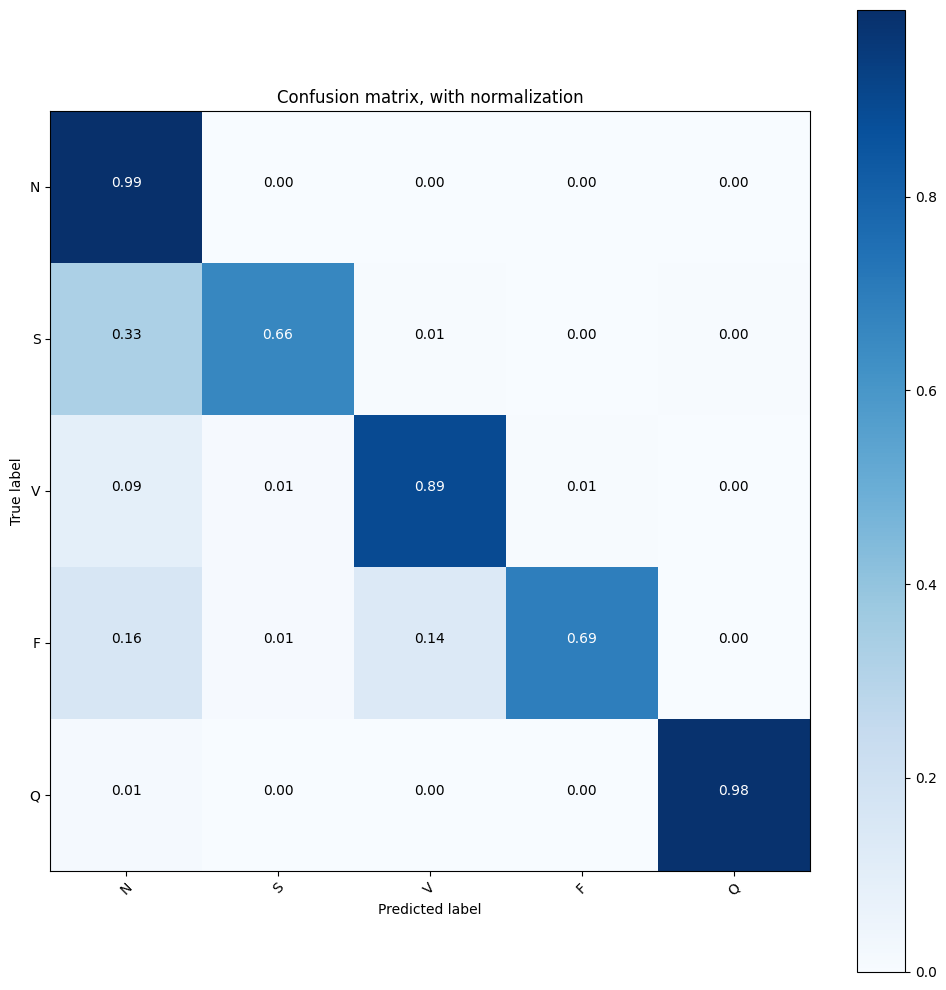

              precision    recall  f1-score   support

           N       0.99      0.98      0.98     18118
           S       0.66      0.86      0.75       556
           V       0.89      0.96      0.92      1448
           F       0.69      0.85      0.76       162
           Q       0.98      0.98      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.84      0.92      0.88     21892
weighted avg       0.97      0.97      0.97     21892



In [20]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """The function prints and plots the confusion matrix."""
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_pred, y_test)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix, with normalization')
plt.show()

weighted_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(classification_report(y_test, y_test_pred, target_names=class_names.values()))

In [22]:
model.save('my_model.h5')